# Profit Estimation of Companies with Linear Regression
*Source: YouTube Simplilearn Tutorials*

Note: some of the code provided in the video tutorial is outdated - for example the method for onehotencoding no longer works. Get_dummies is a more popular method, and as we have already been introduced get_dummies in previous exercises we use that method here

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Include the various libraries needed for the model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

from sklearn.metrics import mean_absolute_error, mean_squared_error

### Loading the Dataset

In [2]:
#Read in the datafile and view the head
df = pd.read_csv('1000_Companies.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Understanding the Data

**Use a variety of techniques here to help understand the dataset** 

In [3]:
#Check for null values etc
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

**Create  a scatterplot to show the how Marketing_Spend and R&D Spend vary By State**

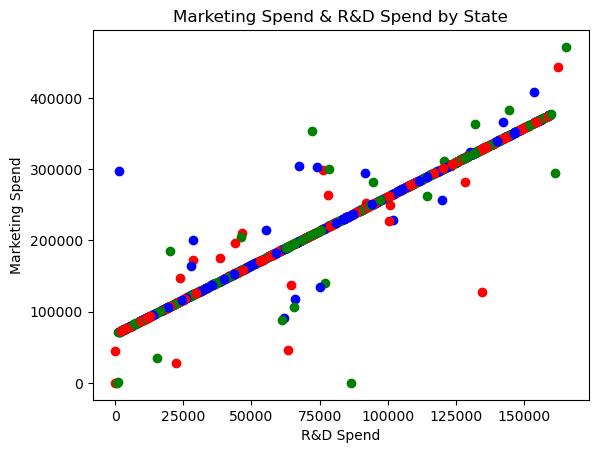

In [4]:
#Create the scatterplot

# there are 3 different states - create color dictionary for each state
colors = {'California':'r', 'New York':'g', 'Florida':'b'}

# create a figure and axis
fig, ax = plt.subplots()

# plot each data-point
for i in range(len(df['R&D Spend'])):
    ax.scatter(df['R&D Spend'][i], df['Marketing Spend'][i],color=colors[df['State'][i]])

# set a title and labels
ax.set_title('Marketing Spend & R&D Spend by State')
ax.set_xlabel('R&D Spend')
ax.set_ylabel('Marketing Spend')

plt.show()

**Create a Box and Whisker chart to show the Marketing Spend by State**

In [5]:
#Perform a series of calculations to get the Marketing Spend for each state
msNY = df.loc[(df.State == 'New York')]['Marketing Spend']
msCal = df.loc[(df.State == 'California')]['Marketing Spend']
MsFl = df.loc[(df.State == 'Florida')]['Marketing Spend']

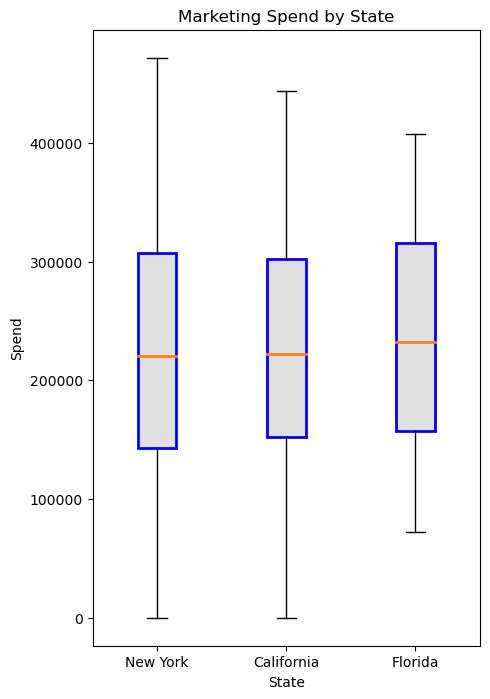

In [6]:
#Create the box and whisker chart to show Marketing Spend by State

plt.figure(figsize=(5,8), dpi=100)

plt.style.use('default')

#patch_artist is a facecolour
bp = plt.boxplot([msNY, msCal, MsFl], labels=['New York','California','Florida'], patch_artist=True, medianprops={'linewidth': 2})

plt.title('Marketing Spend by State')
plt.ylabel('Spend')
plt.xlabel('State')

#We can style the boxes
for box in bp['boxes']:
    # change outline color
    box.set(color='blue', linewidth=2)
    # change fill color to grey - but you must set patch_artist property to True - see above
    box.set(facecolor = '#e0e0e0' )
    # change hatch
    #box.set(hatch = '/')
    
plt.show()

### Encoding Categorical Data

In [7]:
#Convert the Position column to numeric values - we will use Get Dummies

#Use get_dummies on the Position column and assign the output to a temporary variable called dummies
#dummies = pd.get_dummies(df['Position'], prefix = "dummies")

#Display the contents of dummies
#dummies

In [8]:
#Use get_dummies to make State numerical 
dummies = pd.get_dummies(df['State'], prefix="dummies").astype(int)
dummies
#Add the temporary dummies columns to end of the existing dataframe df - concatenate and update the dataframe
temp_df = pd.concat([df, dummies], axis=1)
temp_df

,R&D Spend,Administration,Marketing Spend,State,Profit,dummies_California,dummies_Florida,dummies_New York
0,165349.20,136897.800,471784.1000,New York,192261.83000,0,0,1
1,162597.70,151377.590,443898.5300,California,191792.06000,1,0,0
2,153441.51,101145.550,407934.5400,Florida,191050.39000,0,1,0
3,144372.41,118671.850,383199.6200,New York,182901.99000,0,0,1
4,142107.34,91391.770,366168.4200,Florida,166187.94000,0,1,0
...,...,...,...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,California,95279.96251,1,0,0
996,134970.00,130390.080,329204.0228,California,164336.60550,1,0,0
997,100275.47,241926.310,227142.8200,California,413956.48000,1,0,0
998,128456.23,321652.140,281692.3200,California,333962.19000,1,0,0


In [9]:
#Rearrange the columns so that profit is as the end

# Step 1: Create a list of all column names except 'Profit'
columns = [col for col in temp_df.columns if col != 'Profit']

# Step 2: Append 'Profit' to the end of the list
columns.append('Profit')

# Step 3: Reindex the DataFrame with the new column order
temp_df = temp_df[columns]
temp_df


,R&D Spend,Administration,Marketing Spend,State,dummies_California,dummies_Florida,dummies_New York,Profit
0,165349.20,136897.800,471784.1000,New York,0,0,1,192261.83000
1,162597.70,151377.590,443898.5300,California,1,0,0,191792.06000
2,153441.51,101145.550,407934.5400,Florida,0,1,0,191050.39000
3,144372.41,118671.850,383199.6200,New York,0,0,1,182901.99000
4,142107.34,91391.770,366168.4200,Florida,0,1,0,166187.94000
...,...,...,...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,California,1,0,0,95279.96251
996,134970.00,130390.080,329204.0228,California,1,0,0,164336.60550
997,100275.47,241926.310,227142.8200,California,1,0,0,413956.48000
998,128456.23,321652.140,281692.3200,California,1,0,0,333962.19000


In [10]:
#Drop the State column
temp_df.drop(labels=['State'], axis=1, inplace = True)

#View the datatypes now
temp_df.dtypes

C:\Users\JordanFujitsu\AppData\Local\Temp\ipykernel_34448\2254541374.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df.drop(labels=['State'], axis=1, inplace = True)


R&D Spend             float64
Administration        float64
Marketing Spend       float64
dummies_California      int32
dummies_Florida         int32
dummies_New York        int32
Profit                float64
dtype: object

### Visualising the Data

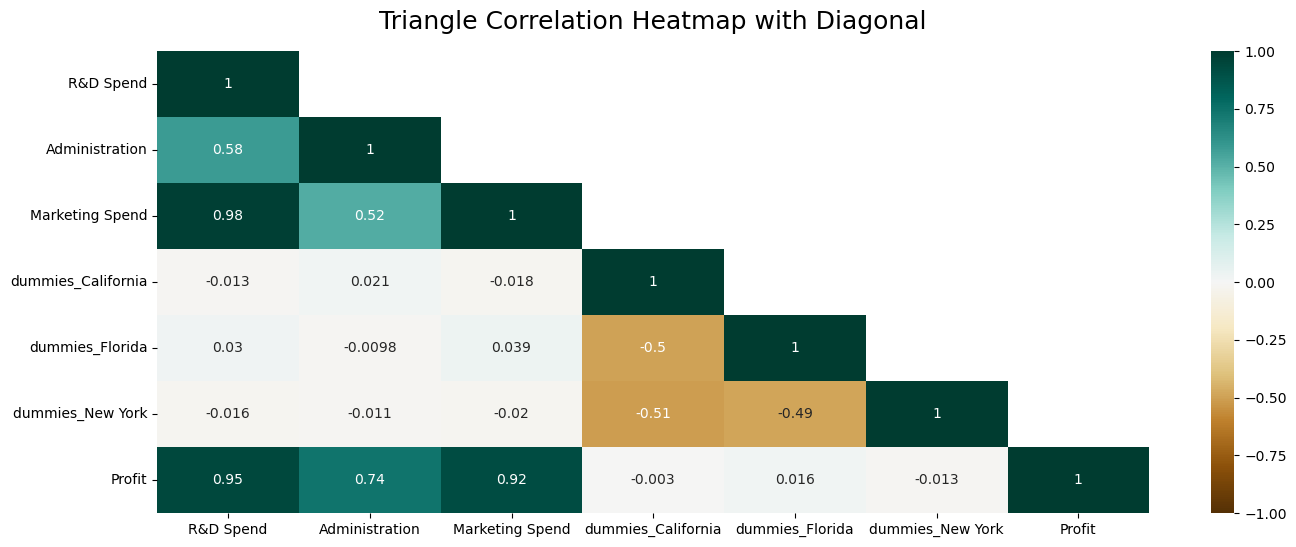

In [11]:
#Create a Correlation Matrix and Heatmap
# Calculate correlation matrix
corr = temp_df.corr()

# Create a mask for the upper triangle without the diagonal
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Optional: If you want to also keep -1 correlations visible, you would need to identify these specifically.
# This can get complex if you're looking for exactly -1, given floating point arithmetic.
# An example approach (not shown here) could involve setting mask elements to False where corr == -1.

plt.figure(figsize=(16, 6))

# Create the heatmap with the mask and correct aspect ratio
heatmap = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap with Diagonal', fontdict={'fontsize':18}, pad=16)
plt.show()

**What does the Heatmap above tell us?**

### Extracting Dependent and Independent Variables

In [12]:
#Assign everything except the profit column to X (capital letter)

#Assign the profit column to y (lower case letter)

# Dependent variable (Y)
y = temp_df['Profit']

# Independent variables (X)
X = temp_df[['R&D Spend', 'Administration', 'Marketing Spend', 'dummies_California', 'dummies_Florida', 'dummies_New York']]
X



,R&D Spend,Administration,Marketing Spend,dummies_California,dummies_Florida,dummies_New York
0,165349.20,136897.800,471784.1000,0,0,1
1,162597.70,151377.590,443898.5300,1,0,0
2,153441.51,101145.550,407934.5400,0,1,0
3,144372.41,118671.850,383199.6200,0,0,1
4,142107.34,91391.770,366168.4200,0,1,0
...,...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,1,0,0
996,134970.00,130390.080,329204.0228,1,0,0
997,100275.47,241926.310,227142.8200,1,0,0
998,128456.23,321652.140,281692.3200,1,0,0


In [13]:
#Display the top ten rows in X - do you have 6 values in each row? Do these figures look right?
X.head(10)

,R&D Spend,Administration,Marketing Spend,dummies_California,dummies_Florida,dummies_New York
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0
5,131876.90,99814.71,362861.36,0,0,1
6,134615.46,147198.87,127716.82,1,0,0
7,130298.13,145530.06,323876.68,0,1,0
8,120542.52,148718.95,311613.29,0,0,1
9,123334.88,108679.17,304981.62,1,0,0


In [14]:
#Display the top 10 rows in y - do these figures look right?
y.head(10)

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
5    156991.12
6    156122.51
7    155752.60
8    152211.77
9    149759.96
Name: Profit, dtype: float64

### Splitting the Dataset into Train and Test

In [37]:
#Split the dataset into Train & Test - using a test size of 0.2 and a random state of 4
  #Note: The relevant library has been included above

#This new library should be included at the top of the Notebook, but for demonstration purposes we are using it here
from sklearn.model_selection import train_test_split

#random-state is needed when we are to run and validate our model multiple times
  #If test_size is 0.2, what does that mean?
  #The code below is using the columns we have specified, and allocating a specified amount of records for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=4)

In [36]:
X_test

,R&D Spend,Administration,Marketing Spend,dummies_California,dummies_Florida,dummies_New York
118,29104.00,114755.3069,124935.2867,0,1,0
19,86419.70,153514.1100,0.0000,0,0,1
41,27892.92,84710.7700,164470.7100,0,1,0
425,145038.00,131876.9681,348630.2563,0,1,0
221,84817.00,122983.2565,232433.6723,0,1,0
...,...,...,...,...,...,...
714,58265.00,119061.9362,181201.5158,1,0,0
744,125850.00,129043.1969,311606.9579,0,0,1
671,36025.00,115777.4317,138289.3751,0,1,0
286,57470.00,118944.5270,179667.5611,1,0,0


### Fitting the Model to the Training Set

In [16]:
#Fit the model to the training set
  #Note: The rele

#Print the shape of the individual training and testing sets to see the amount of rows and columns in each.
  #Has there been an 80/20 split?
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 6)
(200, 6)
(800,)
(200,)


### Predicting the Test Dataset

In [40]:
#Predict the model - test data
#This new library should be included at the top of the Notebook, but for demonstration purposes we are using it here
  #Different libraries are required, depending on your choice of algorithm
from sklearn.linear_model import LinearRegression

#Assign the linear regression function to a variable
lin_model = LinearRegression()
#Fit the model to the training data so that the model can learn
lin_model.fit(X_train, y_train)

y_test_predict = lin_model.predict(X_test)
y_test_predict

array([ 49850.1224746 , 129016.74788452, 184127.13488554, 137972.28773341,
        70693.41216955,  79574.69517155, 181682.53630156, 165124.95046805,
       143731.34705312, 161755.34659805,  92022.60185211,  72523.42589674,
       129680.18863681, 156705.49113607, 111470.68680171, 181304.28892785,
       116123.38824539, 104671.00795331, 103077.02693849, 185566.83855093,
       126430.84510999, 121667.85743863,  68124.74163574, 106506.28902596,
        78658.14771553, 172527.26087499, 166492.53481699, 170263.60072863,
        50440.37519602, 103135.45832563, 116581.76551149, 105184.52833734,
       163805.82350541, 145908.59008465,  59834.47519319, 120774.52466689,
        54391.67605402, 173966.96465504,  68955.334997  , 143866.61996513,
       163370.91673645,  69803.97033029, 169828.69406616, 104703.79812105,
       135719.22283282, 172200.66126563,  85909.42020725,  81666.64792588,
       116354.30002715, 159304.76557869,  69091.67661281,  87073.50608401,
       146796.09865404, 1

### Evaluating the Model & Finding the Residuals (Errors)

In [41]:
y_test

698     50468.96294
577    128337.62140
763    182979.80610
790    137842.46720
520     70509.78421
           ...     
127    138793.29350
924    151891.28880
632    172769.31560
869    132471.53730
11     144259.40000
Name: Profit, Length: 200, dtype: float64

In [18]:
#Note: The relevant library has been included above, find the:

y_test_predict = lin_model.predict(X_test)

#Mean Absolute Error
mae = mean_absolute_error(y_test, y_test_predict)

#Mean Square Error  
mse = mean_squared_error(y_test, y_test_predict)

#Route Mean Square Error 
rmse = (np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Square Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 1155.1111960703972
Mean Squared Error (MSE): 26120994.12377196
Root Mean Square Error (RMSE): 5110.8701924204615


In [19]:
#Note: The relevant library has been included above, find the:

# R-Squared Error
r2 = r2_score(y_test, y_test_predict)
print(f"Root Square Error (R2): {r2}")

Root Square Error (R2): 0.9843975434785197
